<a href="https://colab.research.google.com/github/9james/deep-learning/blob/master/chestxray_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=0.003),
              metrics=['acc'])




Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 128)      

In [19]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    '/content/gdrive/My Drive/dataset/chest_xray/train',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator=val_datagen.flow_from_directory(
    '/content/gdrive/My Drive/dataset/chest_xray/val',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

test_generator=test_datagen.flow_from_directory(
    '/content/gdrive/My Drive/dataset/chest_xray/test',
     target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)







Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [20]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 38s 376ms/step - loss: 0.5838 - acc: 0.7426 - val_loss: 0.6408 - val_acc: 0.7500
Epoch 2/30
100/100 [==============================] - 34s 343ms/step - loss: 0.3750 - acc: 0.8250 - val_loss: 0.5979 - val_acc: 0.6875
Epoch 3/30
100/100 [==============================] - 35s 347ms/step - loss: 0.3136 - acc: 0.8677 - val_loss: 0.7764 - val_acc: 0.6875
Epoch 4/30
100/100 [==============================] - 35s 346ms/step - loss: 0.3288 - acc: 0.8555 - val_loss: 0.3637 - val_acc: 0.8125
Epoch 5/30
100/100 [==============================] - 33s 332ms/step - loss: 0.2211 - acc: 0.9115 - val_loss: 0.1843 - val_acc: 0.9375
Epoch 6/30
100/100 [==============================] - 34s 341ms/step - loss: 0.1620 - acc: 0.9420 - val_loss: 0.1697 - val_acc: 0.9375
Epoch 7/30
100/100 [==============================] - 34s 341ms/step - loss: 0.1347 - acc: 0.9505 - val_loss: 0.2903 - val_acc: 0.8750
Epoch 8/30
100/100 [==============================] - 3

In [0]:
model.save('/content/gdrive/My Drive/chestxray2.h5')

In [22]:
test_loss,test_acc=model.evaluate_generator(test_generator,steps=50)
print('test loss: ',test_loss,'  ','test_acc: ',test_acc )

test loss:  1.9973070051490776    test_acc:  0.7571138194421443


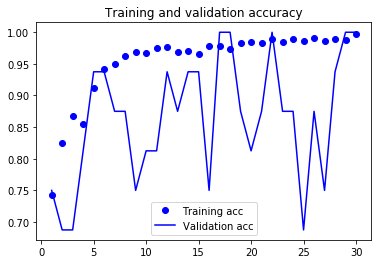

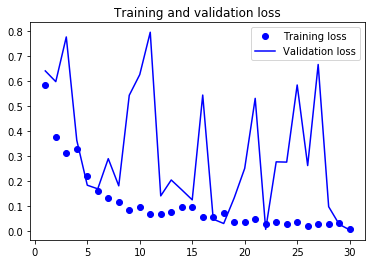

In [23]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
